In [2]:
#lets import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading dataset to pandas dataframe
df_train = pd.read_csv(r"C:\Users\User\Downloads\train.csv")

In [4]:
#print first 5 row of dataset
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
#total rows and columns in dataset
df_train.shape

(891, 12)

In [7]:
#getting statistical information
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


We can find out age has some missing values.

In [8]:
#finding missing values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df_train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [11]:
#filling the age column with mean value
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())

In [12]:
#lets drop cabin columns as it has more nan values
df_train.drop(columns='Cabin',inplace=True,axis=1)

In [13]:
#lets drop nan rows in Embarked
df_train.dropna(how='any',inplace=True)

In [14]:
#rechecking the Nan Values
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data Visualization

<AxesSubplot:xlabel='Sex', ylabel='count'>

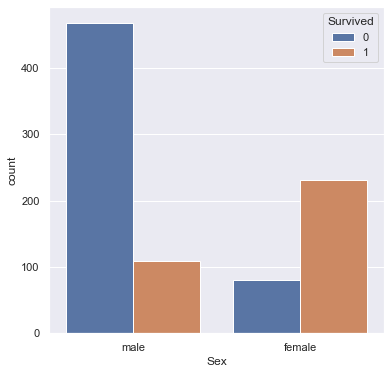

In [15]:
plt.figure(figsize=(6,6))
sns.set_theme()
sns.countplot(data=df_train,x='Sex',hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

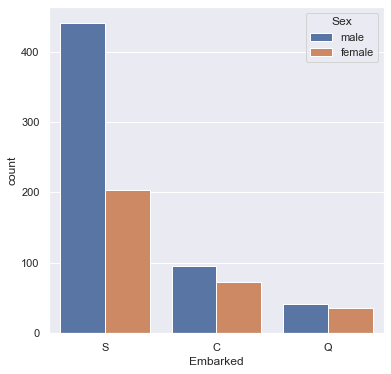

In [16]:
plt.figure(figsize=(6,6))
sns.set_theme()
sns.countplot(data=df_train,x='Embarked',hue='Sex')

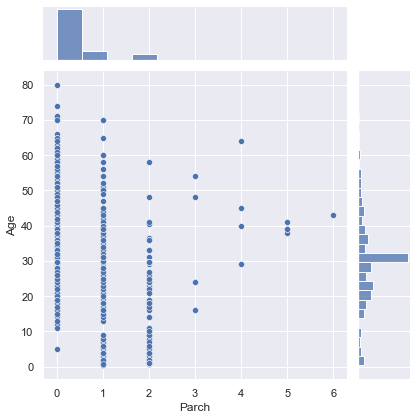

In [17]:
sns.jointplot(data=df_train,x='Parch',y='Age')

<AxesSubplot:xlabel='Parch', ylabel='count'>

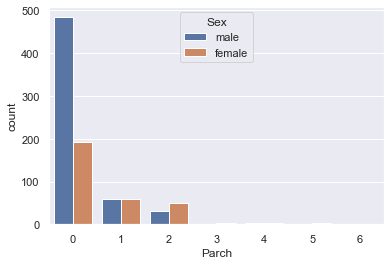

In [18]:
sns.countplot(data=df_train,x='Parch',hue='Sex',orient='Survived')

<AxesSubplot:xlabel='Age', ylabel='Density'>

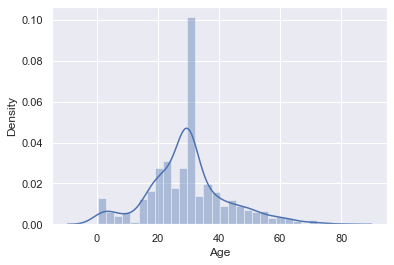

In [19]:
sns.distplot(df_train.Age)

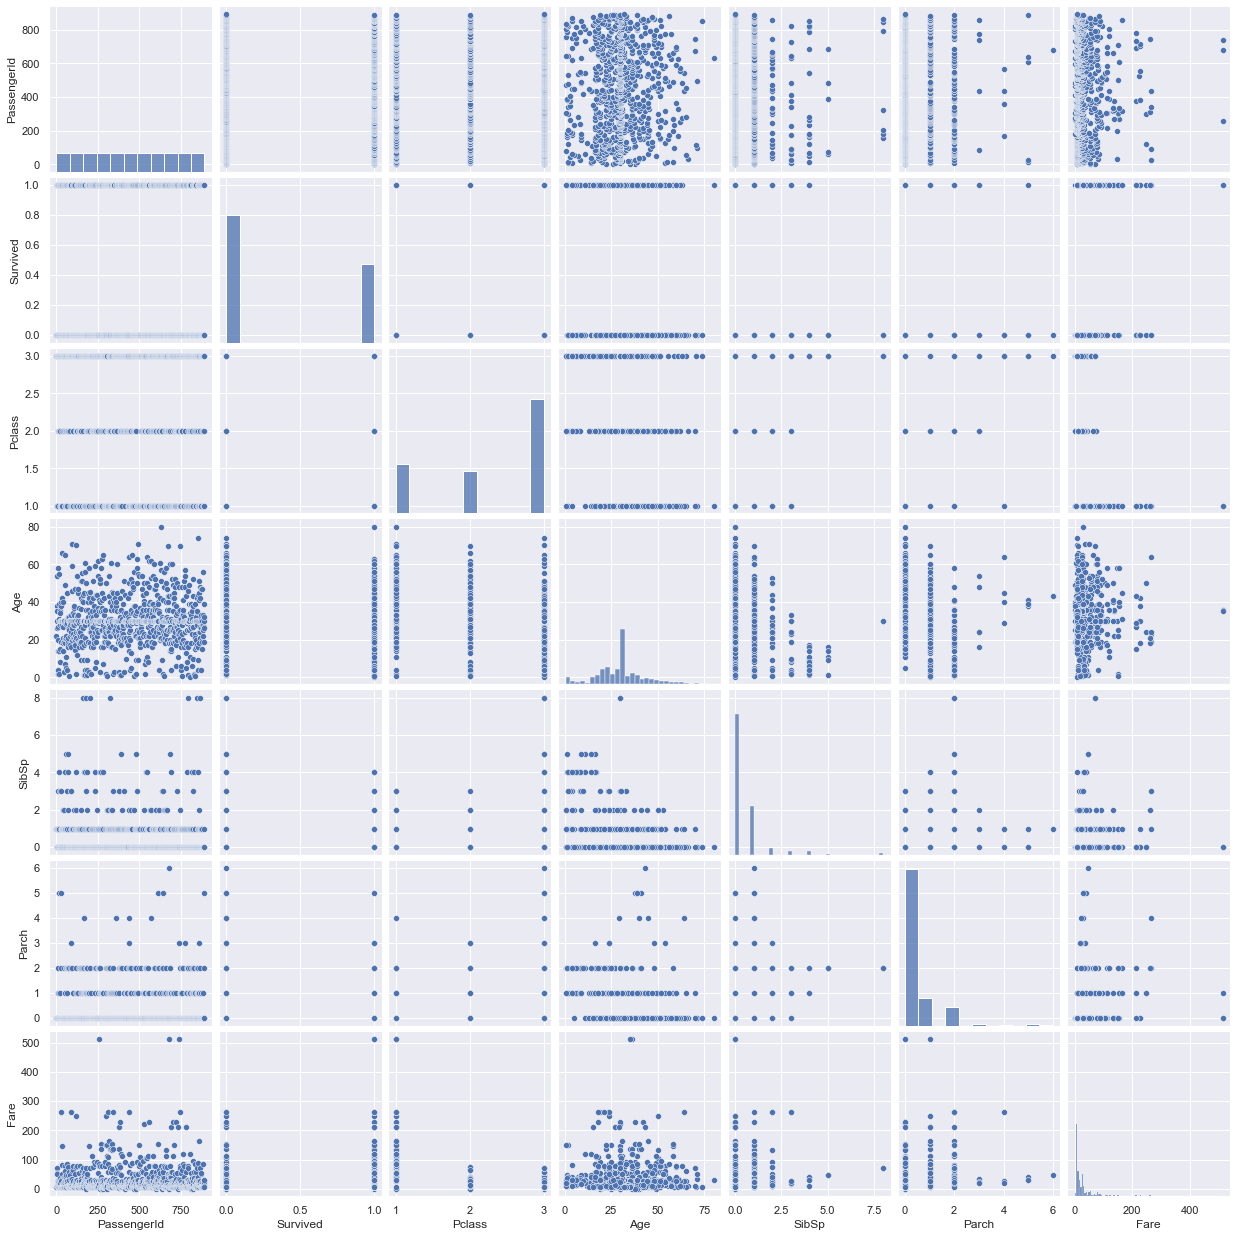

In [20]:
sns.pairplot(data=df_train)

<AxesSubplot:>

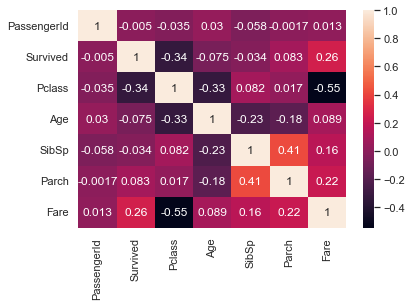

In [21]:
sns.heatmap(df_train.corr(),annot=True)

# Label Encoder

In [22]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [23]:
label = LabelEncoder()

In [24]:
labels = label.fit_transform(df_train.Embarked)

In [25]:
lables1 = label.fit_transform(df_train.Sex)

In [26]:
df_train['Sex'] = lables1

In [27]:
df_train['Embarked'] = labels

In [28]:
X = df_train.drop(columns=['Survived','PassengerId','Name','Ticket'],axis=1)
Y = df_train['Survived']

In [29]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    1  22.000000      1      0   7.2500         2
1         1    0  38.000000      1      0  71.2833         0
2         3    0  26.000000      0      0   7.9250         2
3         1    0  35.000000      1      0  53.1000         2
4         3    1  35.000000      0      0   8.0500         2
..      ...  ...        ...    ...    ...      ...       ...
886       2    1  27.000000      0      0  13.0000         2
887       1    0  19.000000      0      0  30.0000         2
888       3    0  29.699118      1      2  23.4500         2
889       1    1  26.000000      0      0  30.0000         0
890       3    1  32.000000      0      0   7.7500         1

[889 rows x 7 columns]


In [30]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


# Splitting data into train test and split

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

# Data Standarization

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [34]:
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [35]:
print(X_train_std)

[[-1.58111127  0.73187236  2.57419587 ... -0.4703656  -0.10744253
   0.61864133]
 [-1.58111127  0.73187236  0.83275801 ... -0.4703656  -0.08444238
  -1.85244847]
 [ 0.80313075 -1.36635848 -2.01686758 ...  0.73261981 -0.30094395
   0.61864133]
 ...
 [ 0.80313075  0.73187236 -0.67121105 ... -0.4703656  -0.47087159
   0.61864133]
 [ 0.80313075  0.73187236  0.75360174 ... -0.4703656  -0.4733272
   0.61864133]
 [ 0.80313075  0.73187236 -0.11711719 ... -0.4703656   0.48083715
   0.61864133]]


In [36]:
print(X_test_std)

[[ 0.80313075  0.73187236  0.01737862 ... -0.4703656  -0.47676504
  -0.61690357]
 [ 0.80313075  0.73187236 -0.67121105 ... -0.4703656  -0.47087159
   0.61864133]
 [-0.38899026 -1.36635848 -0.43374225 ...  1.93560522  0.64790058
   0.61864133]
 ...
 [ 0.80313075  0.73187236 -0.03796092 ... -0.4703656  -0.44238661
   0.61864133]
 [ 0.80313075  0.73187236  1.38685187 ... -0.4703656  -0.48658745
   0.61864133]
 [ 0.80313075  0.73187236 -0.27542972 ... -0.4703656  -0.47390082
   0.61864133]]


In [37]:
print(X_train_std.std())

1.0


In [38]:
print(X_test_std.std())

0.9676945967196485


# Model Evalution

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
classifier = LogisticRegression()

In [40]:
classifier.fit(X_train_std,Y_train)

LogisticRegression()

In [41]:
#accuracy on the training data
X_data_prediction = classifier.predict(X_train_std)
training_data_accuracy = accuracy_score(X_data_prediction,Y_train)

In [42]:
#accuracy on the training data
X_data_prediction = classifier.predict(X_test_std)
test_data_accuracy = accuracy_score(X_data_prediction,Y_test)

In [43]:
print("Accuracy Score on training dataset is: ",training_data_accuracy)

Accuracy Score on training dataset is:  0.8030942334739803


In [44]:
print("Accuracy Score on test dataset is: ",test_data_accuracy)

Accuracy Score on test dataset is:  0.7921348314606742


In [45]:
from sklearn.svm import LinearSVC

model = LinearSVC(loss='hinge',dual=True)
model.fit(X_train_std,Y_train)

LinearSVC(loss='hinge')

In [46]:
X_data_prediction = model.predict(X_test_std)
test_data_accuracy = accuracy_score(X_data_prediction,Y_test)

In [47]:
#accuracy on the training data
X_data_prediction = model.predict(X_test_std)
test_data_accuracy = accuracy_score(X_data_prediction,Y_test)

In [48]:
print("SVC Accuracy Score on test dataset is: ",test_data_accuracy)

SVC Accuracy Score on test dataset is:  0.8033707865168539


# Predictive Model

In [ ]:
input_data= ()

#changing the inputdata to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)